> # BT3102 HW2
> This homework contains several coding tasks and Q&A questions. 
>
>>For coding part, please write codes in corresponding cells starts from **YOUR CODES HERE**. 
>>
>>For Q&A, you will see cells with **Answer: HERE**. Please double click those cells and directly write your answer.
>>
>>For other cells, please directly run the cell.
>>
>>**Please make sure you have expanded all hidden cells!** You can refer to https://stackoverflow.com/questions/62457417/unhide-all-cells-in-google-colab for more information.
>
>
> You should use Python 3 to do this homework. Python 2 may not be supported. (You can also submit code in MATLAB alternatively.)
>
>
> ## Due Date: Oct. 25 (Wed), 22:00 SG Time
> ## Deliverables
> Save your notebook `ipynb` file as `StudentID_YourName_HW2.ipynb`, generate an `html` file from `ipynb` file and save as `StudentID_YourName_HW2.html`. Zip your notebook file and html file into a single `zip` file. 
>
> **Upload the `zip` file as `StudentID_YourName_HW2.zip`.**
>
> **Please make sure your code is executable.**
>
>>How to generate an HTML file from your notebook file in Google Colab?  
>>Please refer to https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab
>
> ## HW2 worths 7 points in the final assessment.

**STU1**

StuID: A0239429U

Name: Tay Xinyu, Zandra


**STU2**

StuID: A0229830A

Name: Lucas Wee Song Wen

*In compliance with the* [*general message*](https://libguides.nus.edu.sg/new2nus/acadintegrity#s-lib-ctab-22144949-4) *and* [*guidelines*](https://libguides.nus.edu.sg/new2nus/acadintegrity#s-lib-ctab-22144949-5) *on the use of AI tools for academic work from the University, if you use any AI tools for this homework, please fill in the table below. Thank you.*


| AI Tool used    |   Prompt and output   |   How the output was used in the assignment   |
| ---- | ---- | ---- |
|   --   |   --   |   --   |
|   --   |   --   |   --   |

# Problem 1. Short Answer Questions (3')

Throughout the problem, assume that the Stable Unit Treatment Value Assumption (SUTVA) holds. By default, 0 stands for control group and 1 stands for treatment group.

## (a) - (0.5') 
Explain the notation $Y_i(0)$.

It is the potential outcome of an unit, i, who has not received the treatment.

## (b) - (0.5') 
Contrast the meaning of $Y_i(0)$ with the meaning of $Y^{obs}_i$.


 $Y^{obs}_i$ refers to the observed outcome of an individual i, while $Y_i(0)$ refers to the potenetial outcome of an individual i. The definition is as follows: 
  $Y^{obs}_i$ = $D_iY_i(1) + (1 − D_i)Y_i(0)$. If $D_i = 1$, then $Y^{obs}_i = Y_i(1)$. Else if $D_i = 0$, then $Y^{obs}_i = Y_i(0)$.

## (c) - (1') 
Contrast the meaning of $Y_i(0)$ with the meaning of $Y_i(1)$. Is it ever possible to observe both at the same time? Why? 

$Y_i(0)$ refers to the potential outcome of an untreated individual i, while $Y_i(1)$ refers to the potential outcome of a treated individual i.
It is not possible to observe both at the same time.  This is due to the Fundamental Problemof Causal Inference, which posits that we can never observe both $Y_i(0)$ and $Y_i(1)$ for the same i. This is because $Y_i(0)$ and $Y_i(1)$ are not constant across individuals. Furthermore, the same subject at different times is considered to be a different subject.

## (d) - (0.5') 
Explain the notation $\mathbb{E}[Y_i(0)|D_i=1]$, where $D_i$ is a binary variable that gives the treatment status for subject $i$, 1 if treated, 0 if controlled. 


This refers to the average potential outcome of a treated group, had they not received the treatment. This is also known as the counterfactual.

## (e) - (0.5') 
Contrast the meaning of $\mathbb{E}[Y_i(0)]$ with the meaning of $\mathbb{E}[Y^{obs}_i|D_i=0]$. 

$\mathbb{E}[Y_i(0)]$ refers to the average potential outcome of the untreated, while $\mathbb{E}[Y^{obs}_i|D_i=0]$ refers to the average observed outcome of the untreated.

# Problem 2. Randomized Experiment (4')

Suppose a study is conducted to analyze the effect of drinking milk before bedtime on sleep duration. The objective is to examine whether consuming milk before sleeping can lead to increased sleep duration (in hours). To verify its effects, you establish two groups: 1 as the treatment group and 0 as the control group. You would like to know whether drinking milk works or not. Thus, you did a pilot study with $N=18$ patients. 

You first implemented the completely randomized experiment. Hence, half of the subjects (i.e., 9 patients) were assigned to treatment group (1), while the rest were assigned to the control group (0).


## (a)
Load the data and print the data. It should have 2 columns. One is the observed value of the sleeping hours and the other is the assignment outcome.

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import statistics
from scipy.special import comb

# fix the random seed
np.random.seed(2023)

# Load the data
Data = pd.read_csv("sleep_data.csv")

Data.head()

,observed,Treatment
0,8.361396,1
1,7.611676,0
2,8.031000,0
3,8.564644,1
4,5.380255,1


## (b) - (0.5')

Fisher Sharp Null Hypothesis (or Exact Null Hypothesis)

Consider the following Null Hypothesis: the sleeping hours for the treatment group are 0.7 hours more than the control group, i.e.,


$H_0: Y_i(1)=Y_i(0)+0.7,~for~all~i~in~\{1,2,...,18\}.$

Based on this null hypothesis $H_0$, what should be the table that describes the potential outcomes for all patients in this experiment? **Print the table** (there should be 4 columns: The FIRST column displays the observed outcome and the SECOND column displays assignment. These two columns are the same as shown in the `Data`. The THIRD column displays the $Y_i(1)$ under $H_0$ and the FOURTH column displays the $Y_i(0)$ under $H_0$)

In [2]:
# YOUR CODES HERE

# Make a copy of Data
df = Data

# Add new column for Yi(1)
df['Yi(0)'] = df['observed'] - 0.7 * df['Treatment']

# Add new column for Yi(0)
df['Yi(1)'] = df['Yi(0)'] + 0.7

# display table
df

,observed,Treatment,Yi(0),Yi(1)
0,8.361396,1,7.661396,8.361396
1,7.611676,0,7.611676,8.311676
2,8.031000,0,8.031000,8.731000
3,8.564644,1,7.864644,8.564644
4,5.380255,1,4.680255,5.380255
5,6.690788,0,6.690788,7.390788
6,8.087047,1,7.387047,8.087047
7,7.700993,0,7.700993,8.400993
8,8.091761,1,7.391761,8.091761
9,6.814341,1,6.114341,6.814341


## (c) - (0.5')

We choose the test statistic 

$T=\bar{Y}^{obs}_1-\bar{Y}^{obs}_0$.

Generate the EXACT Probability Distribution of this test statistic $T$ under $H_0$ in a **completely randomized experiment** with **equal** number of patients in each group. 

Report the total number (denoted as `Num`) of realizations of the randomized assignment vector, quantiles 25%, 50%, 75% of the distribution of the test statistic $T$, and the variance of $T$. 

(Hint: you can use Realizations = list(combinations(range(N), N//2)) to help generate realizations of the randomized assignment vector.)



In [3]:
# YOUR CODES HERE
mat = np.array(range(1, 19))
N  = 18 # sample size
realizations = list(combinations(range(N), N//2))
# print(realizations)
rows = len(realizations)

# initialise empty list to store T values
T_values = np.zeros(rows)

for i in range(0, rows):
    row_matrix = realizations[i]
    T_values[i] = np.mean(df.loc[np.isin(mat, row_matrix), 'Yi(1)']) - np.mean(df.loc[~np.isin(mat, row_matrix), 'Yi(0)'])
    # print(np.mean(df.loc[np.isin(mat, row_matrix), 'Yi(1)']) - np.mean(df.loc[~np.isin(mat, row_matrix), 'Yi(0)']))

In [4]:
print(f'Total number of realizations: {rows}')

percentiles = np.percentile(T_values, [25, 50, 75])
print(f'25th percentile: {percentiles[0]}')
print(f'50th percentile: {percentiles[1]}')
print(f'75th percentile: {percentiles[2]}')

print(f'Variance of T: {np.std(T_values) * np.std(T_values)}')

Total number of realizations: 48620
25th percentile: 0.5253174228333326
50th percentile: 0.8475799500527774
75th percentile: 1.1696955663437496
Variance of T: 0.20660639429378824


## (d) - (0.5') 
Plot the histogram of this test statistic $T$ with `bins = 50`.


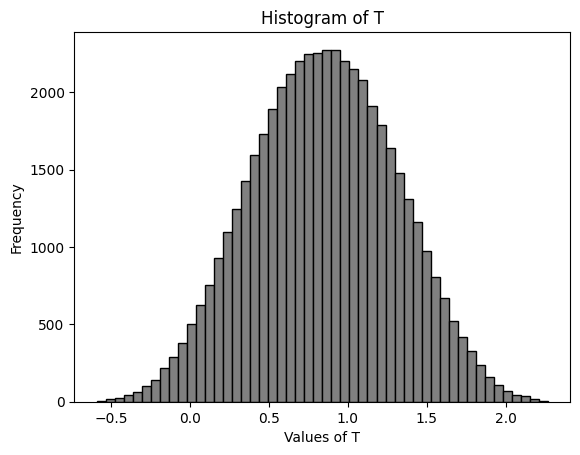

In [5]:
# YOUR CODES HERE
plt.hist(T_values, bins=50, color='gray', edgecolor='black')

plt.title('Histogram of T')
plt.xlabel('Values of T')
plt.ylabel('Frequency')
plt.show()

## (e) - (1') 
Redo (c) but using a Bernoulli trial to do the randomized assignment, i.e., flipping an unbiased coin to determine each subject's group. You need to generate all the possible realizations of the randomized assignment vector.

For example, if $N_{example} = 3$, then the possible realizations of the randomized assignment vector are 
[0, 0, 1],
[0, 1, 0],
[0, 1, 1],
[1, 0, 0],
[1, 0, 1],
[1, 1, 0].
Note that, here, we will ignore vectors with all 0's or all 1's, i.e., [0, 0, 0], and [1, 1, 1] in the above example.

Report the quantiles 25%, 50%, 75% of the distribution of the test statistic $T$, and the variance of $T$. Compare the results with (c) and describe your findings. 


In [6]:
# YOUR CODES HERE
from itertools import product

N = 18  # sample size

# Generating all possible realizations using a Bernoulli trial
realizations = list(product([0, 1], repeat=N))
rows = len(realizations)

# Initialise an array to store T values
T_values2 = np.zeros(rows)

# For each realization, compute the T value
for i in range(rows):
    treatment_assignment = np.random.binomial(n=1, p=0.5, size=N)
    
    treat_indices = np.where(treatment_assignment == 1)
    control_indices = np.where(treatment_assignment == 0)

    # Calculate the T value for this random assignment
    T_values2[i] = (
        df.loc[treat_indices, 'Yi(1)'].mean() - 
        df.loc[control_indices, 'Yi(0)'].mean() 
    )


KeyboardInterrupt: 

In [12]:
percentiles2 = np.percentile(T_values2, [25, 50, 75])
print(f'25th percentile: {percentiles2[0]}')
print(f'50th percentile: {percentiles2[1]}')
print(f'75th percentile: {percentiles2[2]}')

print(f'Variance of T: {np.std(T_values2) * np.std(T_values2)}')

25th percentile: nan
50th percentile: nan
75th percentile: nan
Variance of T: nan


Compare the results with (c) and describe your findings. 

Comparing (c) and (e):
- The variance of () is larger.
- The interquartile range of () is larger.

## (f) - (0.5') 
In the original data that you loaded, what is the value ($t_0$) of this test statistic $T$? 

If it is positive, then what is $Pr\{T\geq t_0\}$ under $H_0$ based on the EXACT Probability Distribution of $T$ you have derived in the question (c)? If it is negative, then What is $Pr\{T\leq t_0\}$?

In [26]:
# YOUR CODES HERE
# Calculate mean for Y_1^{obs}. Filter for Treatment = 1
treated = df[df['Treatment'] == 1]
mean_treated_obs = np.sum(treated['observed']) / len(treated)

# Calculate mean for Y_0^{obs}. Filter for Treatment = 0
untreated = df[df['Treatment'] == 0]
mean_untreated_obs = np.sum(untreated['observed']) / len(untreated)

original_T_stat = mean_treated_obs - mean_untreated_obs
print(f'Value of test statistic T in original loaded data: {original_T_stat}')

# Since original_T_stat is positive
# Count the number of times the T_statistic values in (c) exceeds original_T_stat
num_times_exceed = np.sum(T_values > original_T_stat)

# calculate prob that  $Pr\{T\geq t_0\}$ 
probability = num_times_exceed / len(T_values)
print(f'The probability is: {probability}')


Value of test statistic T in original loaded data: 0.1470588537777786
The probability is: 0.9370012340600576


Since the test statistic is positive, the value of $Pr\{T\geq t_0\}$ under $H_0$ is 0.9370012340600576 Since 0.9370012340600576 > 0.05 at a 5% level of significance, we fail to reject the null hypothesis $H_0$. 

## (g) - (0.5') 

Now we consider a different test statistic $G=\max\{Y_1^{obs}\}-\min\{Y_0^{obs}\}$.

Generate the EXACT Probability Distribution of this test statistic $G$, under $H_0$ in a completely randomized experiment with equal number of subjects in each group. Report the the 25%, 50%, 75% quantile of the distribution of this new test statistic $G$, and the variance of $G$. Plot the histogram of this test statistic $G$ with `bins = 100`.

In [31]:
N = 18  # sample size
mat = np.arange(1, N + 1)

# Generate treatment assignments as combinations
treatment_assignment = list(combinations(mat, N//2))
rows = len(treatment_assignment)

# Placeholder for G_values
G_values = np.zeros(rows)

# Assuming df is already defined and is a pandas DataFrame
for i in range(rows):
    row_matrix = np.array(treatment_assignment[i])
    
    t1 = df.iloc[row_matrix - 1, df.columns.get_loc('Yi(1)')]
    t0 = df.iloc[np.setdiff1d(mat, row_matrix) - 1, df.columns.get_loc('Yi(0)')]
    
    G_values[i] = max(t1) - min(t0)

In [10]:
# # OLD
# mat = np.array(range(1, 19))
# N  = 18 # sample size
# realizations = list(combinations(range(N), N//2))
# rows = len(realizations)

# # initialise empty list to store T values
# G_values = np.zeros(rows)

# for i in range(0, rows):
#     row_matrix = realizations[i]
#     G_values[i] = np.max(df.loc[np.isin(mat, row_matrix), 'Yi(1)']) - np.min(df.loc[~np.isin(mat, row_matrix), 'Yi(0)'])

In [33]:
percentiles_G = np.percentile(G_values, [25, 50, 75])
print(f'25th percentile: {percentiles_G[0]}')
print(f'50th percentile: {percentiles_G[1]}')
print(f'75th percentile: {percentiles_G[2]}')

print(f'Variance of G: {np.std(G_values) * np.std(G_values)}')

25th percentile: 3.076119276999999
50th percentile: 3.404075978
75th percentile: 4.3759851329999995
Variance of G: 0.3889317160763571


Plot the histogram of this test statistic $G$ with `bins = 100`.

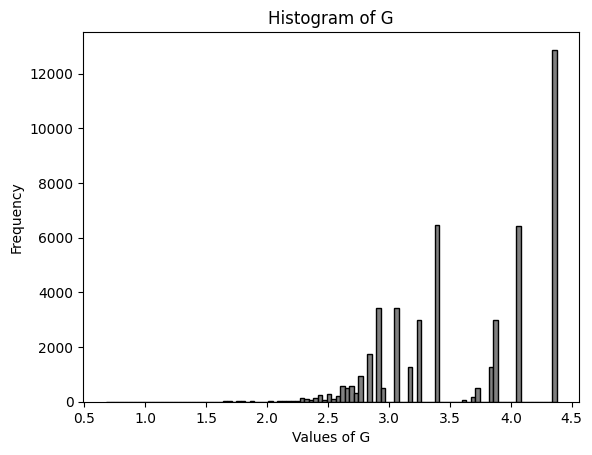

In [32]:
# YOUR CODES HERE
plt.hist(G_values, bins=100, color='gray', edgecolor='black')

plt.title('Histogram of G')
plt.xlabel('Values of G')
plt.ylabel('Frequency')
plt.show()

## (h) - (0.5')
Note that when $N$ (number of patients) is large (e.g., $N=50$),  deriving the exact distribution of the statistic under Fisher Sharp NULL Hypothesis becomes very time-consuming. 

In this case, we often use "bootstrap" strategy, i.e., we will re-execute the randomized assignment procedure for $M$ times. Then, for each iteration, we randomly assign half of the subjects to the control group and the remaining to the treatment group, and we compute the value of our test statistic.

Still use $T$ as the test statistic, set $M=10000$. Report the 25%, 50%, 75% quantile of the distribution of the test statistic $T$, and the variance of $T$. Plot the histogram of this test statistic $T$ with `bins = 50`.

In [ ]:
# YOUR CODES HERE


Plot the histogram of this test statistic $T$ with `bins = 50`.

In [ ]:
# YOUR CODES HERE
